# AMIGA-ALMA

Summary of the ALMA observations for AMIGA with (when needed) upper limits for surface density

In [3]:
## import
import numpy as np
from math import *
from astropy import units as u 
from astropy import coordinates
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy

%matplotlib inline

In [4]:
def surface_density(ICO, D, inclination):
    "molecular gas surface density for ICO (Jy.km/s) and distance D (Mpc)"
    
    beam=3.14159*6.8*5.5/(4.*log(2.))
    dxdy=1.
    dxypc=(1.*41.6)**2


    mco=1.2e4*ICO*D*dxdy/beam
    h2dens=cos(inclination*pi/180.)*mco/dxypc
    
    return h2dens

In [5]:
### plot image with contours..
def plot_image(fitsfile, rms , cont_lev, title = '', vmin = None, vmax = None, sizeW = 60. ):

    multp = np.array(cont_lev) # sigma

    ## Read center fits file
    hdulist = fits.open(fitsfile)
    lon = float(hdulist[0].header['CRVAL1'])
    lat = float(hdulist[0].header['CRVAL2'])
    hdulist.close()
    
    print lon
    
    lev = rms*multp

    fig = aplpy.FITSFigure(fitsfile)
    fig.set_title(title)
    fig.add_beam()
    fig.beam.set_color('black')
    fig.add_scalebar(1 * u.arcsecond)
    fig.scalebar.set_label('1 arcsec')
    fig.scalebar.set_color("black")
    fig.show_colorscale(vmin = vmin, vmax = vmax)
    
    fig.recenter(lon, lat, width= sizeW / 3600. ,height = sizeW / 3600.)
    
    fig.show_contour(fitsfile, colors='green', levels=lev, alpha=0.5);

## CIG 1017

Not detected in continuum and lines ... 


Continuum : rms 40 muJy <br>
Lines : rms 3 mJy

In [6]:
## Surface density  assuining a 150 km/s line
print surface_density(3*3*150*1e-3, 170, 0.)

37.5527390141


# CIG 1019

Continuum : not detected. rms noise 34 muJy 

In [7]:
plot_image('CIG1019_cont.fits',34e-6, [1,2],'CIG 1019 - Cont.', vmin = -1e-6, vmax = 1e-4, sizeW = 60)

351.665621
INFO

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


CO(1-0): line strongly detected and spatially resolved.
Below the moment 0 of CO(1-0)

351.665621
INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Setting slices=[0, 0] [aplpy.core]


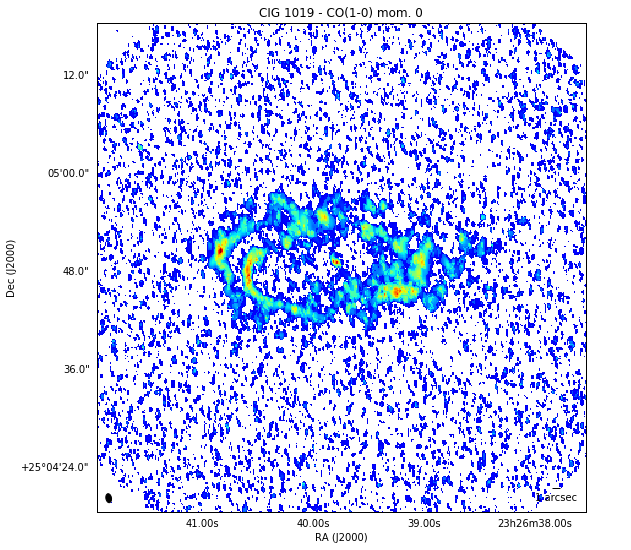

In [8]:
plot_image('CIG1019_spw_2_6.image.mom0.fits',1e-1,[50], 'CIG 1019 - CO(1-0) mom. 0', vmin = -1e-4, vmax = 8e-1, sizeW = 60)

## CIG 1044

cont. : rms noise 38 muJy. point source detected in the center: ~ 150 mJy <br>
line  : rms noise 2 mJy. No detection.

In [9]:
## Continuum image in B3
plot_image('CIG1044_cont.fits',38e-6, [1,2],'CIG 1044 - Continuum B3', vmin = -1e-6, vmax = 4e-4, sizeW = 10.)

358.624604
INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Setting slices=[0, 0] [aplpy.core]


## CIG 222

cont. : rms noise 38 muJy. point source detected in the center: ~ 150 mJy <br>
line  : rms noise 2 mJy. No detection.

120.152662
INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Setting slices=[0, 0] [aplpy.core]


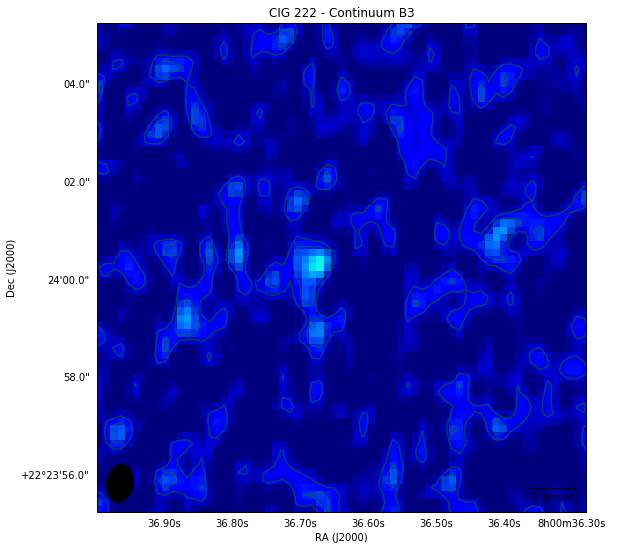

In [10]:
## Continuum image in B3
plot_image('CIG222_cont.fits',38e-6, [1,2],'CIG 222 - Continuum B3', vmin = -3e-6, vmax = 5e-4, sizeW = 10)

Interestingly it looks that the continuum is slightly off-center.

## CIG 234

cont. : rms noise 45 muJy. center detected (barely sá¹•atially resolved): ~380 muJy <br>
line  : rms noise 2mJy . line well detected and spatially resolved.

123.006767
INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Setting slices=[0, 0] [aplpy.core]


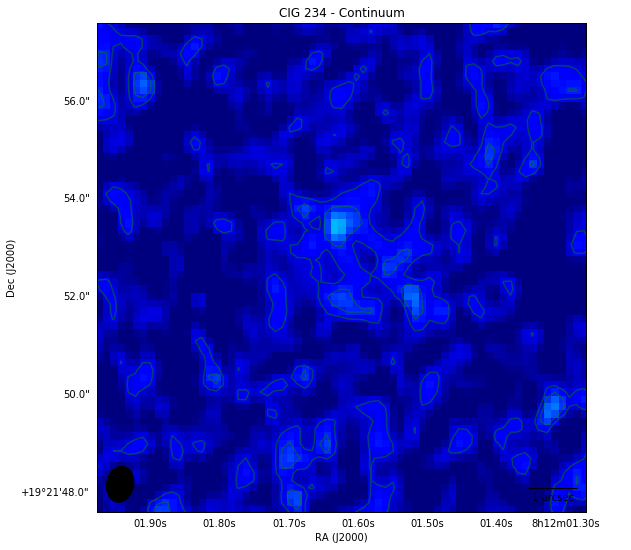

In [15]:
## plot continuum for cig 234
plot_image('CIG234_cont.fits',45e-6, [1,2],'CIG 234 - Continuum', vmin = -2e-5, vmax = 7e-4, sizeW = 10)

123.006767
INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Setting slices=[0, 0] [aplpy.core]


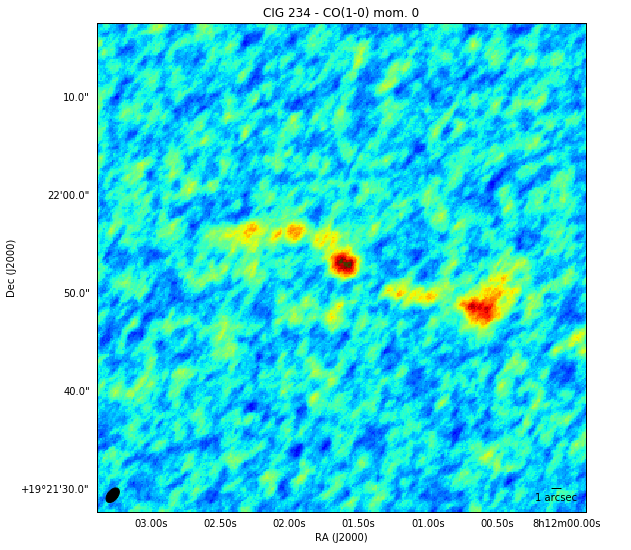

In [12]:
## plot CO)1-0) mom. 0  for cig 234
plot_image('CIG234_spw_3_7.mom0.fits',1e-1,[50], 'CIG 234 - CO(1-0) mom. 0', vmin = -1e-4, vmax = 5e0, sizeW = 50.)

## CIG 268

cont. : rms 41 muJy, cont. detected <br>
line  : rms 2.5 mJy. patchy but probably detected (see channel 263)

129.428954
INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Setting slices=[0, 0] [aplpy.core]


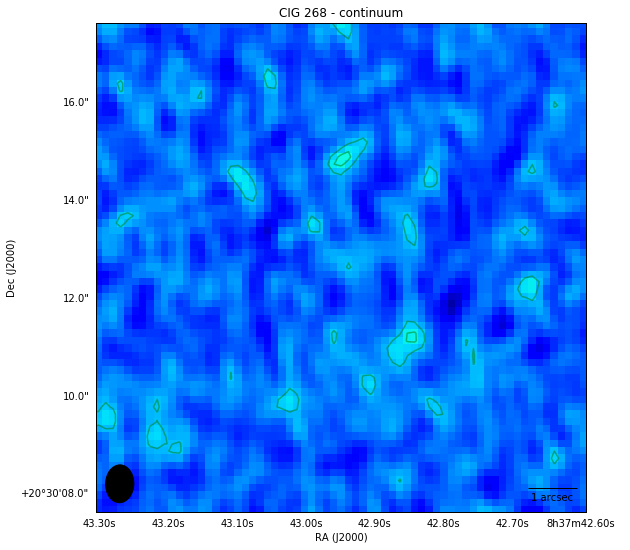

In [17]:
## plot continuum ..
plot_image('CIG_268_cont.fits',41e-6,[2,3], 'CIG 268 - continuum', vmin = -2e-4, vmax = 7e-4, sizeW= 10.)

## CIG 494

cont. : rms noise 35 muJy. no detect. <br>
line  : rms noise 2 mJy. no detect.

## CIG 501

cont. : rms noise 34 muJy. no detect. <br>
line :  rms noise 2 mJy. line detected but not resolved spatially

177.158829
INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Setting slices=[0, 0] [aplpy.core]


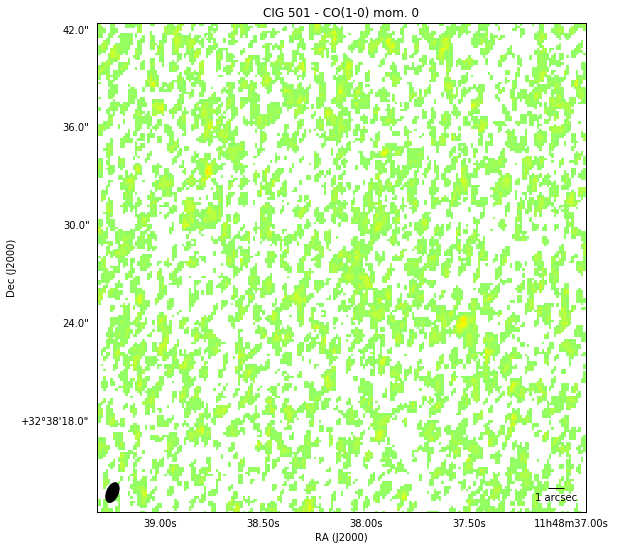

In [20]:
## plot continuum ..
plot_image('CIG501_spw_2_6.mom0.fits',1e-1,[50], 'CIG 501 - CO(1-0) mom. 0', vmin = -1e0, vmax = 1e0, sizeW= 30.)

## CIG 55

cont. : rms noise 39 muJy. strong detection of the center and spatially resolved: ~3 mJy <br>
line  : rms 1.6 mJy. Line detected in the center (barely resolved)

23.794138
INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Setting slices=[0, 0] [aplpy.core]


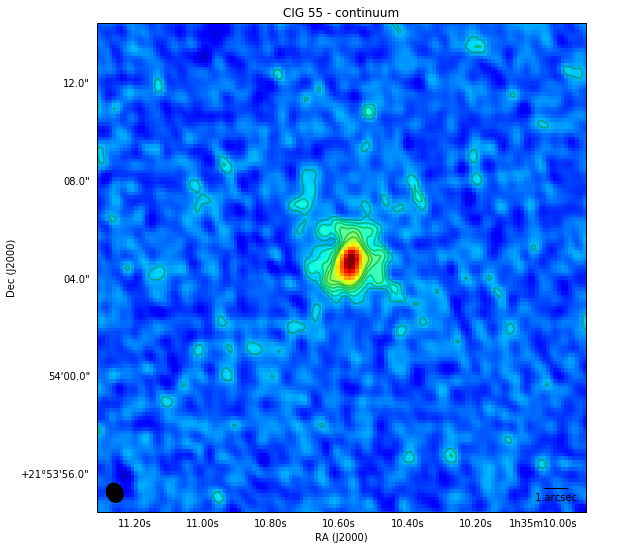

In [24]:
plot_image('CIG55_cont.fits',39e-6,[2,3, 4,5,6,7,20,30,40,50], 'CIG 55 - continuum', vmin = -2e-4, vmax = 7e-4, sizeW= 20.)

23.794138
INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Setting slices=[0, 0] [aplpy.core]


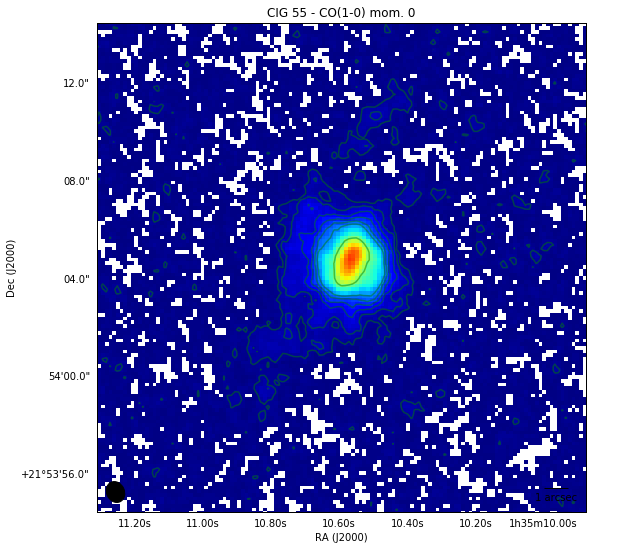

In [34]:
plot_image('CIG55_spw_3_7.mom0.fits',5e-2,[5,10,20,30,40,50,100,500], 'CIG 55 - CO(1-0) mom. 0', vmin = -1e-5, vmax = 10e0, sizeW= 20.)

## CIG 664

cont. : rms noise 44 muJy. no detect. <br>
line  : rms noise 1.8 mJy. maybe detected but i did not find the redshift of the galaxy,

## CIG 676

cont. : rms noise 38 muJy. no detect. <br>
line  : the line frequency is not in the spw. (113 GHz)

## CIG 82

cont. : rms noise 37 muJy. Point source of 265 muJy at 10 arcsec of the center (SE) <br>
line : rms noise 2 mJy. no detect.

## CIG 86

cont. : rms noise 39 muJy. maybe some point sources... <br>
line : rms noise 2.6 muJy. maybe some channels .. we may want to re-clean..

## CIG 88

cont. : rms noise 40 muJy. No detect. <br>
line : rms noise 2 mJy. no detect.

## CIG 930

cont : rms nois 39 muJy. some point sources probably... (could be bgd) <br>
line : rms noise 2 mJy. no detect.

## CIG 931

cont. : rms noise 37 muJy. No detect. <br>
line : rms noise 1.8 mJy. no detect.

## CIG 935

cont. :  rms 38 muJy. no detect. <br>
line :  rms 2.5 mJy. line detected, spatially resolved (clumps) and narrow.

## CIG 956

cont. : rms noise 45 muJy. point source detected in the center: ~ 630 muJy <br>
line : rms noise 1.6 mJy.  no detect.

## CIG 976 

cont: rms noise 29 muJy. point source detected in the center ~ 300 muJy <br>
line : rms noise 2.5 mJy. Probably weak clump detected at 114.1413 GHz in the SE

## CIG 992

cont. : rms noise 35 muJy. no detect. <br>
line: rms noise 2.2 mJy. line detected and resolved in the center at 113.9378 GHz. several clumps.